In [2]:
import pandas as pd

In [3]:
dataset=pd.read_csv("Placement_Data_Full_Class.csv")
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


 1)Replace the NaN values with correct value. And justify why you have
 chosen the same.

In [4]:
#checking is null is present in the dataset

dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
#Removing NAN values
dataset.fillna(0,inplace=True)

In [6]:
#After removing the null values again we are checking is null is present in the dataset

dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [7]:
#Now our data is pre processed clearly 
#In this dataset we doesn't have any 'null' values and 
dataset.to_csv("Preplacementdatafullclass.csv",index=False)

 Ans : Replaced the NaN values with '0' using "fillna"
 Justify: 
 we cannot drop the values of the student because, who are not placed there salary only showing as NaN.
 If we removed those data our prediction will go wrong that why we are simply replacing with '0'.


2)How many of them are not placed?

Ans : based on the null check 67 members data is NaN so, 67 students are not palced

 3)Find the reason for non placement from the dataset?


In [8]:
# First step is to separated the placed and non placed students

non_placed= dataset[dataset['status']=='Not Placed']
placed=dataset[dataset['status']=='Placed']

In [9]:
#find the average score of the test marks.
numerical_marks = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
non_placed[numerical_marks].mean()

ssc_p       57.544030
hsc_p       58.395522
degree_p    61.134179
etest_p     69.587910
mba_p       61.612836
dtype: float64

In [10]:
placed[numerical_marks].mean()

ssc_p       71.721486
hsc_p       69.926554
degree_p    68.740541
etest_p     73.238041
mba_p       62.579392
dtype: float64

Ans : Based on the 'mean' calculation 'non placed' students average score is less than placed student 

 4)What kind of relation between salary and mba_p?

In [11]:
dataset.corr(numeric_only=True)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


Ans : Relation between mba_p and salary is 0.139823 is 
positive correlation but not much it’s just 13% so we consider as zero 
correlation. 

5)Which specialization is getting minimum salary?

In [12]:
# Group by specialization and calculate average salary
avg_salary = dataset.groupby('specialisation')['salary'].mean()

# Display the specialization with minimum salary
#idxmin() is a function that return index label of minimum value from the dataset
min_specialisation = avg_salary.idxmin()
min_salary_value = avg_salary.min()

print("Specialization with minimum salary:", min_specialisation)
print("Average salary:", min_salary_value)

Specialization with minimum salary: Mkt&HR
Average salary: 150842.1052631579


Ans : Marketing and HR specilization is getting minimum salary

 6)How many of them getting above 500000 salary?

In [13]:
(dataset['salary']>500000).sum()   

np.int64(3)

Ans: "3" of them getting above 500000 salary.

7)Test the Analysis of Variance between etest_p and mba_p at signifance
 level 5%.(Make decision using Hypothesis Testing)

In [14]:
import scipy.stats as stats
stats.f_oneway(dataset['etest_p'],dataset['mba_p'])

F_onewayResult(statistic=np.float64(98.64487057324709), pvalue=np.float64(4.672547689133573e-21))

H0= There is no significant difference between etest_p and mba_p

H1= There is significant difference between etest_p and mba_p

Ans: pvalue "4.672547689133573e-21" is extreme significant < 0.05 in question we can accept significant difference level 5%.
    
    so, we reject null hypothesis and accept alternate hypothesis

8)Test the similarity between the degree_t(Sci&Tech) and specialisa
tion(Mkt&HR) with respect to salary at significance level of 5%.(Make
 decision using Hypothesis Testing)

In [15]:
from scipy.stats import ttest_ind
#diiiferent group and same condition
degree=dataset[dataset['degree_t']=='Sci&Tech']['salary']
speclization=dataset[dataset['specialisation']=='Mkt&HR']['salary']
ttest_ind(degree,speclization)

TtestResult(statistic=np.float64(2.692041243555374), pvalue=np.float64(0.007897969943471179), df=np.float64(152.0))

H0= There is no significant difference between degree_t(Sci&Tech) and specialisation(Mkt&HR)

H1= There is significant difference between degree_t(Sci&Tech) and specialisation(Mkt&HR)

Ans : This is unpaired T-Test( independent sample) ---> Different group and same condition.

    Ans: pvalue 0.00789796994 < 0.05 in question we can accept significant difference level 5%.
    
    so, we reject null hypothesis and accept alternate hypothesis

 9)Convert the normal distribution to standard normal distribution for
 salary column

In [16]:
#Answer
def stdNBgraph(dataset):
        # Coverted to standard Normal Distribution
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]

    z_score=[((j-mean)/std) for j in values]

    sns.distplot(z_score,kde=True)

    sum(z_score)/len(z_score)

C:\Users\PRIYANKA MANI\AppData\Local\Temp\ipykernel_19468\4035057796.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde=True)


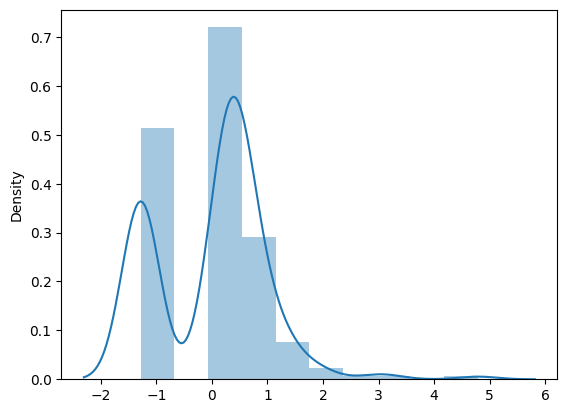

In [17]:
stdNBgraph(dataset["salary"])

 10)What is the probability Density Function of the salary range from
 700000 to 900000?

In [18]:
#Answer
#PDF-Probability Density Function
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

C:\Users\PRIYANKA MANI\AppData\Local\Temp\ipykernel_19468\3347254165.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


Mean=198702.326, Standard Deviation=154780.927
The area between range(700000,900000):0.0005973310593974868


np.float64(0.0005973310593974868)

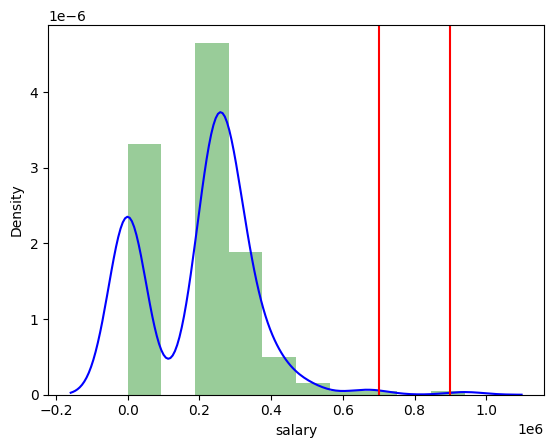

In [19]:
get_pdf_probability(dataset["salary"],700000,900000)

11)Test the similarity between the degree_t(Sci&Tech)with respect to
 etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)

In [20]:
from scipy.stats import ttest_ind
#same group and different condition
commerce=dataset[dataset['degree_t']=='Sci&Tech']['etest_p']
commerce1=dataset[dataset['degree_t']=='Sci&Tech']['mba_p']
ttest_ind(commerce,commerce1)

TtestResult(statistic=np.float64(4.532000225151251), pvalue=np.float64(1.4289217003775636e-05), df=np.float64(116.0))

H0= There is no significant difference between etest_p and mba_p

H1= There is significant difference between etest_p and mba_p

Ans: This is Paired T-Test (Dependent Sample)----> Same group and different condition 

    pvalue "1.4289217003775636e-05" is power of 5(0.000014289)  < 0.05 in question we can accept significant difference level 5%.
    
    so, we reject null hypothesis and accept alternate hypothesis

12)Which parameter is highly correlated with salary?

In [21]:
# Select only numeric columns
numeric = dataset.select_dtypes(include='number')

# Correlation with salary
correlation = numeric.corr()['salary'].sort_values(ascending=False)

print("Correlation with Salary:")
print(correlation)

Correlation with Salary:
salary      1.000000
ssc_p       0.538090
hsc_p       0.452569
degree_p    0.408371
etest_p     0.186988
mba_p       0.139823
sl_no       0.002543
Name: salary, dtype: float64


Ans: Compartively ssc_p is has high value 0.538090 so, it is highly correlated to salary

13) plot any useful graph and explain it.?

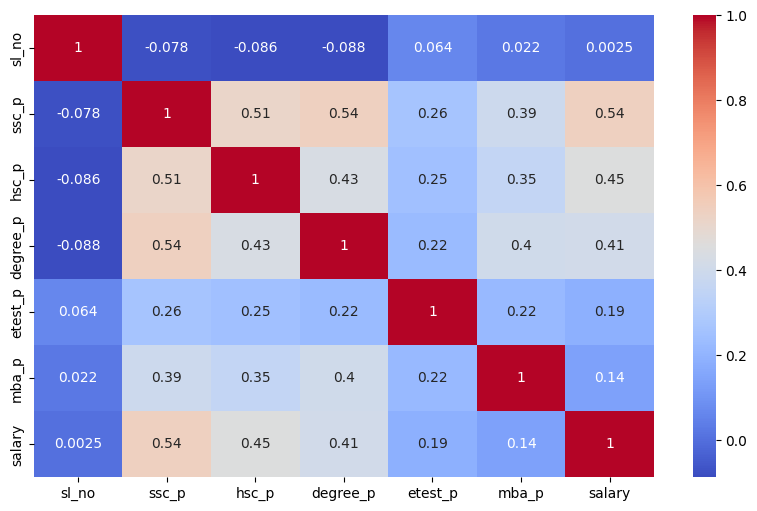

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = dataset.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Ans: 

1,Compare mba_p and etest_p the relation between them is 0.22 is 
positive correlation but not much it’s just 22% so we consider as zero 
correlation. 

2,Compare ssc_p and salary the relation between them is 0.54 is 
positive correlation but it very low near to 0.54 means it is low degree 
of positive correlation 